In [1]:
%%time
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 19.3 s


In [2]:
#https://www.kaggle.com/c/titanic
titanic = pd.read_csv('data/titanic.csv')
#titanic.head(3)

In [3]:
#Поиск пропущенных значений
#titanic.isnull().sum()

In [4]:
#удалим столбцы(axis=1) полей из таблицы
X = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis = 1)

#заменяем строковые данные разбивая их на столбцы
X = pd.get_dummies(X)

#грубо заполняем пропущенные значения
X = X.fillna({'Age':X.Age.median()})

#будем предсказывать выживание
y = titanic.Survived


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
clf_opt = tree.DecisionTreeClassifier()
param_opt = {'criterion':['gini','entropy'],
             'max_depth':range(1,30)}

In [7]:
grid_search_cv_clf_opt = GridSearchCV(clf_opt,
                                      param_opt,
                                      cv=5)

In [8]:
grid_search_cv_clf_opt.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [9]:
grid_search_cv_clf_opt.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [10]:
best_clf = grid_search_cv_clf_opt.best_estimator_

In [11]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [12]:
best_clf.score(X_test,y_test)

0.7932203389830509

In [13]:
from sklearn.metrics import precision_score, recall_score
#Предсказаные значения
y_pred = best_clf.predict(X_test)  

In [14]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8041237113402062
0.65


0    [0.8852459 0.1147541]


<AxesSubplot:>

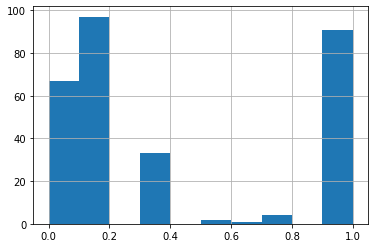

In [15]:
#Вероятность предсказаные значения
y_pred_prob = best_clf.predict_proba(X_test)

print(y_pred[0],'  ',y_pred_prob[0])
#Выжившие
pd.Series(y_pred_prob[:,1]).hist()

In [16]:
import numpy as np
#установим порог 0.8 для выживших
y_pred = np.where(y_pred_prob[:,1] > 0.2,1,0)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.7480916030534351
0.8166666666666667


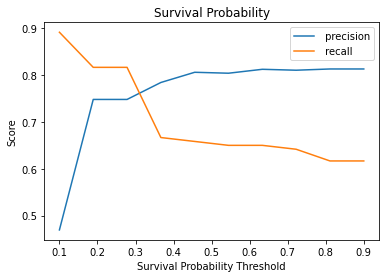

In [51]:
N = 10
pre = np.zeros(N,dtype='float')
rec = np.zeros(N,dtype='float')
prob = np.linspace(0.1,0.9,N)
i = 0

for p in prob:
    y_pred = np.where(y_pred_prob[:,1] > p,1,0)   
    pre[i] = precision_score(y_test,y_pred)
    rec[i] = recall_score(y_test,y_pred)
    i += 1
    
plt.plot(prob,pre,label = ' precision')
plt.plot(prob,rec,label = ' recall')
plt.title('Survival Probability')
plt.ylabel('Score')
plt.xlabel('Survival Probability Threshold')
plt.legend()

plt.show()
